# Nhận Xét:
    - Phân tích 3 nhóm khách hàng tương ứng với cluster 0 (VIP), cluster 2 (NEW) và cluster 4 (REGULAR)
    - VIP mang lại doanh thu cao, NEW để tạo thêm lượng khách hàng ổn định mới cho cửa hàng và REGULAR mang lại sự ổn định cho doanh thu của cửa hàng.
    - Phân tích dựa trên kết quả phân cụm của kmeans trong machine learning vì kết quả có sự tách biệt khá rõ giữa các nhóm, dễ giải thích cho chủ cửa hàng cũng như đưa ra chiến lược tăng doanh thu cho cửa hàng.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu đã phân cụm từ thuật toán kmeans 
df=pd.read_csv('df_kmeans.csv')

In [3]:
df.head()

,Unnamed: 0,Member_number,Date,productId,items,productName,price,Category,order_id,gross_sales,Recency,Frequency,Monetary,Cluster
0,0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,1,23.4,162,10,109.80,4
1,1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,2,1.8,359,13,119.52,3
2,2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,3,9.0,102,10,107.30,2
3,3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,4,2.4,18,7,14.77,2
4,4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,5,1.8,310,5,21.10,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     38765 non-null  int64  
 1   Member_number  38765 non-null  int64  
 2   Date           38765 non-null  object 
 3   productId      38765 non-null  int64  
 4   items          38765 non-null  int64  
 5   productName    38765 non-null  object 
 6   price          38765 non-null  float64
 7   Category       38765 non-null  object 
 8   order_id       38765 non-null  int64  
 9   gross_sales    38765 non-null  float64
 10  Recency        38765 non-null  int64  
 11  Frequency      38765 non-null  int64  
 12  Monetary       38765 non-null  float64
 13  Cluster        38765 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 4.1+ MB


# VIP: Cluster 0

In [5]:
df_vip = df[df["Cluster"] == 0]

### Top 10 sản phẩm mua nhiều nhất VIP: Cluster 0

In [6]:
top_10_products = df_vip.groupby(["productName","Category"])["items"].sum().sort_values(ascending=False).head(10)
print(top_10_products)

productName       Category           
whole milk        Dairy                  1303
other vegetables  Fresh Food              904
rolls/buns        Bakery & Sweets         815
soda              Beverages               715
yogurt            Dairy                   666
tropical fruit    Fresh Food              634
root vegetables   Fresh Food              547
sausage           Fresh Food              528
beef              Fresh Food              499
shopping bags     Household & Hygiene     432
Name: items, dtype: int64


In [7]:
top_10_products = top_10_products.reset_index()

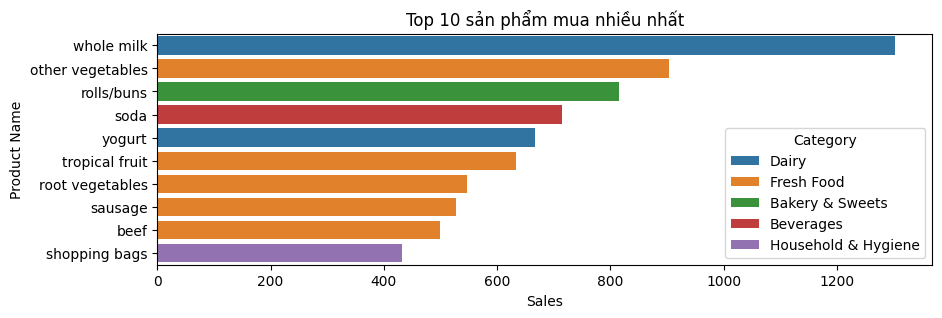

In [8]:


# Vẽ biểu đồ cột
plt.figure(figsize=(10, 3))
sns.barplot(data=top_10_products, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua nhiều nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua ít nhất VIP: Cluster 0

In [9]:
tail_10_products = df_vip.groupby(["productName","Category"])["items"].sum().sort_values(ascending=True).head(10)
print(tail_10_products)

productName           Category            
hair spray            Personal Care           1
salad dressing        Specialty & Seasonal    1
liqueur               Specialty & Seasonal    2
make up remover       Personal Care           2
decalcifier           Household & Hygiene     2
specialty vegetables  Fresh Food              3
baby cosmetics        Personal Care           3
cream                 Dairy                   5
soap                  Household & Hygiene     6
rubbing alcohol       Household & Hygiene     7
Name: items, dtype: int64


In [10]:
tail_10_products = tail_10_products.reset_index()

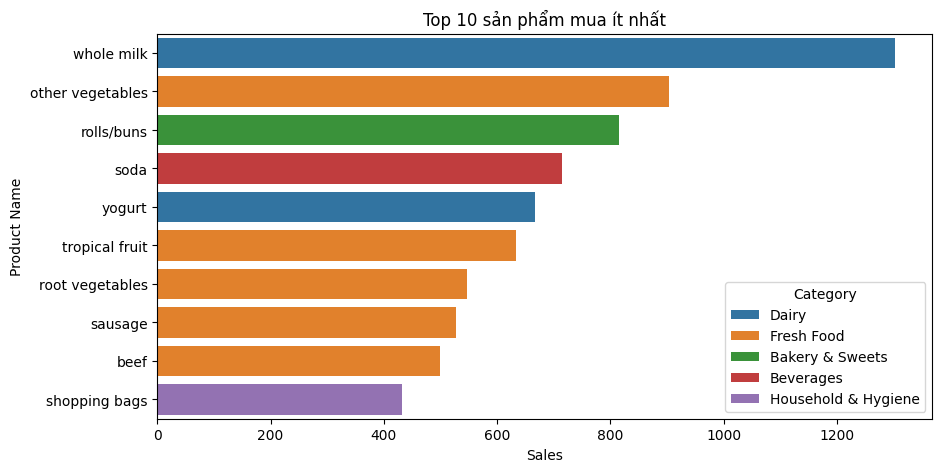

In [11]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_products, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua ít nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá cao nhất VIP: Cluster 0

In [12]:
top_10_expensive_products = df_vip[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=False).head(10)

print(top_10_expensive_products)

              productName  price             Category
3373               whisky   28.5            Beverages
1489       baby cosmetics   25.5        Personal Care
1569              napkins   21.8  Household & Hygiene
8554             prosecco   20.1            Beverages
11                   beef   19.5           Fresh Food
1093  specialty chocolate   18.8      Bakery & Sweets
7711               brandy   15.8            Beverages
51                    ham   15.2           Fresh Food
223            white wine   14.2            Beverages
189              dog food   12.6             Pet Care


In [13]:
top_10_expensive_products = top_10_expensive_products.reset_index()

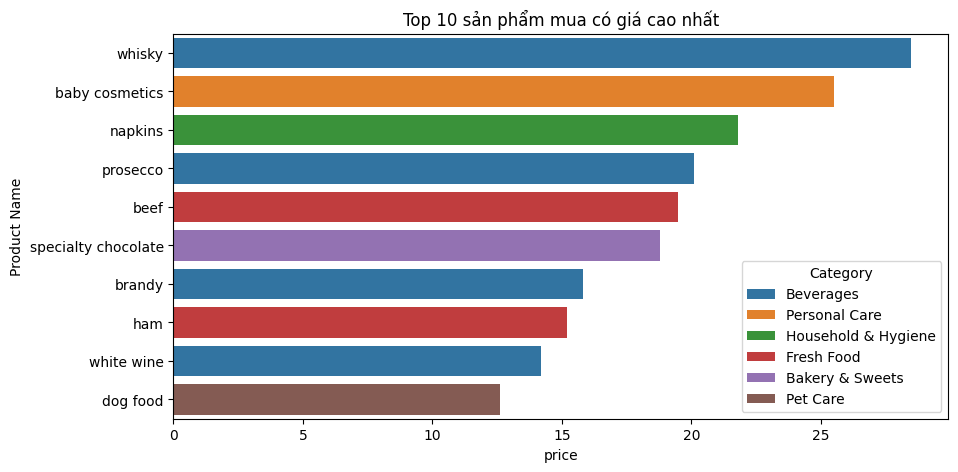

In [14]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_expensive_products, x='price', y='productName', hue='Category')

plt.xlabel("price")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá cao nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá thấp nhất VIP: Cluster 0

In [15]:
top_10_cheapest_products = df_vip[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=True).head(10)

print(top_10_cheapest_products)

                 productName  price                 Category
508              white bread    0.3          Bakery & Sweets
1162             chewing gum    0.5     Specialty & Seasonal
264            bottled water    0.5                Beverages
432              salty snack    0.5                   Snacks
5772   Instant food products    0.6  Frozen & Processed Food
4508                    salt    0.7           Pantry Staples
332                     soda    0.8                Beverages
19          other vegetables    0.8               Fresh Food
491              brown bread    0.8          Bakery & Sweets
14632         snack products    0.9                   Snacks


In [16]:
top_10_cheapest_products = top_10_cheapest_products.reset_index()

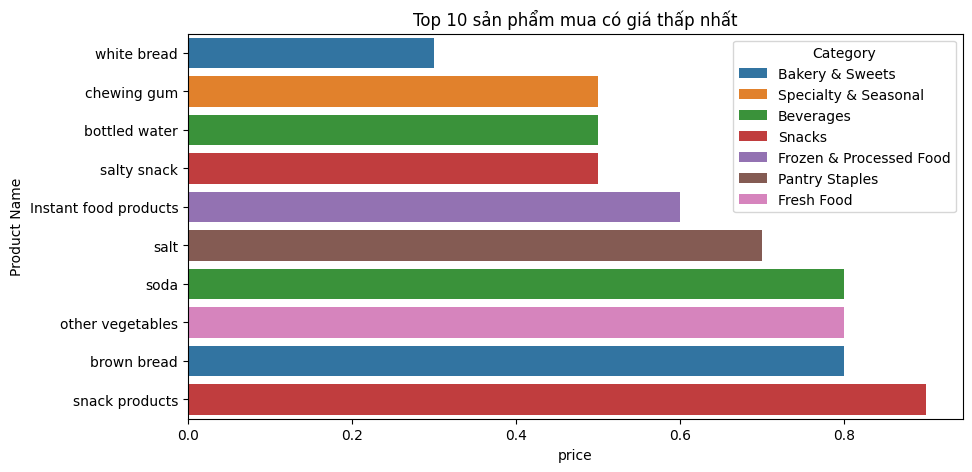

In [17]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_cheapest_products, x='price', y='productName', hue='Category')

plt.xlabel("price")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu cao nhất VIP: Cluster 0

In [18]:
top_10_highest_revenue = df_vip.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=False).head(10)

print(top_10_highest_revenue)

             productName             Category  gross_sales
7                   beef           Fresh Food       9730.5
91               napkins  Household & Hygiene       6518.2
151       tropical fruit           Fresh Food       4945.2
141  specialty chocolate      Bakery & Sweets       3760.0
39                  curd                Dairy       2949.8
27             chocolate      Bakery & Sweets       2875.0
65                   ham           Fresh Food       2812.0
8                berries           Fresh Food       2786.4
66        hamburger meat           Fresh Food       2718.3
108                 pork           Fresh Food       2476.8


In [19]:
top_10_highest_revenue = top_10_highest_revenue.reset_index()

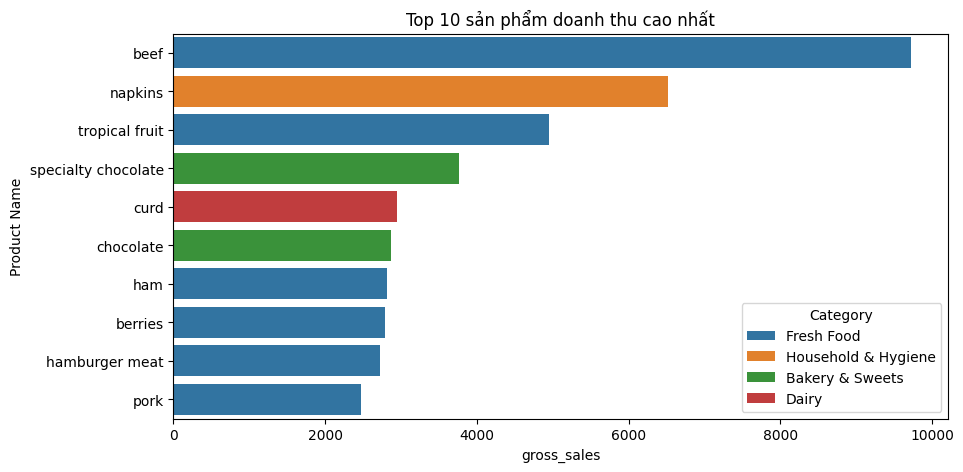

In [20]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_highest_revenue, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu cao nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu thấp nhất VIP: Cluster 0

In [21]:
top_10_lowest_revenue = df_vip.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=True).head(10)

print(top_10_lowest_revenue)

               productName                 Category  gross_sales
64              hair spray            Personal Care          5.4
41             decalcifier      Household & Hygiene          5.6
122         salad dressing     Specialty & Seasonal          5.9
83         make up remover            Personal Care          6.8
0    Instant food products  Frozen & Processed Food          8.4
132         snack products                   Snacks         14.4
120        rubbing alcohol      Household & Hygiene         17.5
150                tidbits                   Snacks         18.7
78                 liqueur     Specialty & Seasonal         19.0
143   specialty vegetables               Fresh Food         19.5


In [22]:
top_10_lowest_revenue = top_10_lowest_revenue.reset_index()

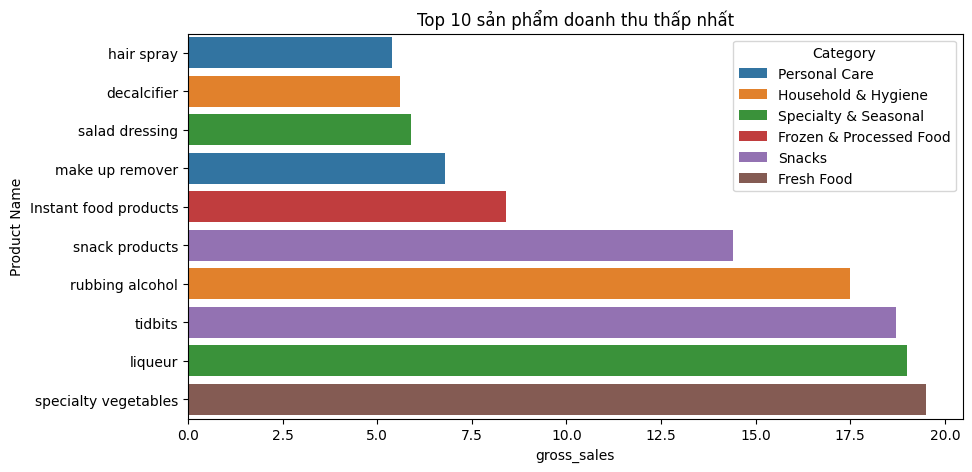

In [23]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_lowest_revenue, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Thời điểm mua hàng nhiều nhất và ít nhất trong năm VIP: Cluster 0

In [24]:
df_vip['Date'] = pd.to_datetime(df_vip['Date'])
df_vip['month'] = df_vip['Date'].dt.month
df_vip['year'] = df_vip['Date'].dt.year
df_vip['sales']=df_vip['items']*df_vip['price']
# Tính tổng doanh thu theo tháng
monthly_sales = df_vip.groupby(['year', 'month'])['sales'].sum().reset_index()

max_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmax()]
min_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmin()]

print("Thời điểm mua hàng nhiều nhất mỗi năm:")
print(max_month_per_year)

print("\nThời điểm mua hàng ít nhất mỗi năm:")
print(min_month_per_year)

Thời điểm mua hàng nhiều nhất mỗi năm:
    year  month    sales
6   2014      7  4350.27
19  2015      8  7409.58

Thời điểm mua hàng ít nhất mỗi năm:
    year  month    sales
2   2014      3  2796.61
15  2015      4  4072.86


C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\3155455079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vip['Date'] = pd.to_datetime(df_vip['Date'])
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\3155455079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vip['month'] = df_vip['Date'].dt.month
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\3155455079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

# NEW: Cluster 2

In [25]:
df_new = df[df["Cluster"] == 2]

### Top 10 sản phẩm mua nhiều nhất NEW: Cluster 2

In [26]:
top_10_products2 = df_new.groupby(["productName","Category"])["items"].sum().sort_values(ascending=False).head(10)
print(top_10_products2)

productName       Category       
whole milk        Dairy              1586
other vegetables  Fresh Food         1268
rolls/buns        Bakery & Sweets    1036
soda              Beverages           893
yogurt            Dairy               829
root vegetables   Fresh Food          687
bottled water     Beverages           616
sausage           Fresh Food          614
tropical fruit    Fresh Food          529
citrus fruit      Fresh Food          527
Name: items, dtype: int64


In [27]:
top_10_products2 = top_10_products2.reset_index()

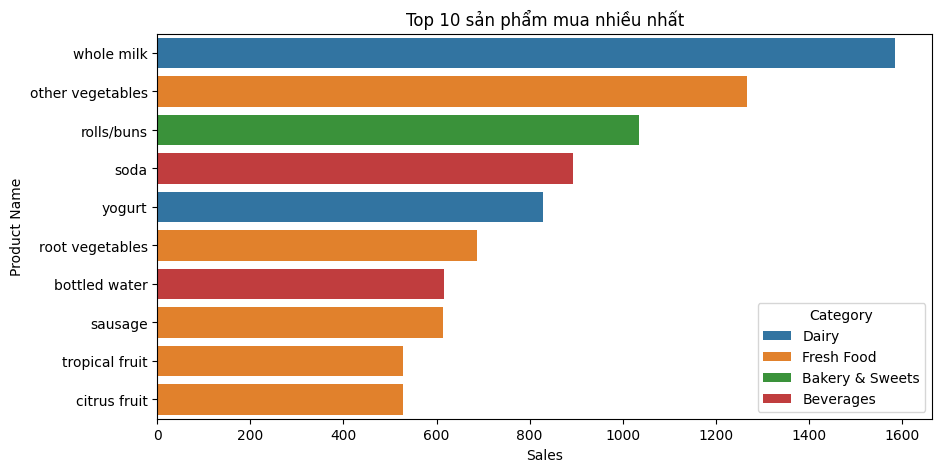

In [28]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_products2, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua nhiều nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua ít nhất NEW: Cluster 2

In [29]:
tail_10_products2 = df_new.groupby(["productName","Category"])["items"].sum().sort_values(ascending=True).head(10)
print(tail_10_products2)

productName             Category               
ready soups             Frozen & Processed Food    1
make up remover         Personal Care              2
specialty vegetables    Fresh Food                 2
whisky                  Beverages                  3
bags                    Household & Hygiene        3
flower soil/fertilizer  Household & Hygiene        3
organic products        Personal Care              4
salad dressing          Specialty & Seasonal       4
cream                   Dairy                      4
tea                     Beverages                  5
Name: items, dtype: int64


In [30]:
tail_10_products2 = tail_10_products2.reset_index()

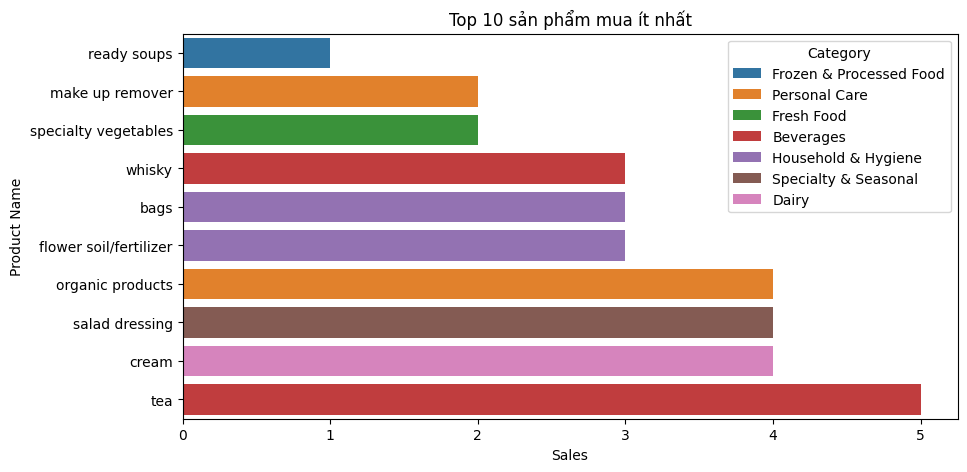

In [31]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=tail_10_products2, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua ít nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá cao nhất NEW: Cluster 2

In [32]:
top_10_expensive_products2 = df_new[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=False).head(10)

print(top_10_expensive_products2)

               productName  price             Category
22355               whisky   28.5            Beverages
1546               napkins   21.8  Household & Hygiene
13837             prosecco   20.1            Beverages
33                    beef   19.5           Fresh Food
1744                  bags   19.5  Household & Hygiene
200    specialty chocolate   18.8      Bakery & Sweets
1450                brandy   15.8            Beverages
57                     ham   15.2           Fresh Food
3511            white wine   14.2            Beverages
1397              dog food   12.6             Pet Care


In [33]:
top_10_expensive_products2 = top_10_expensive_products2.reset_index()

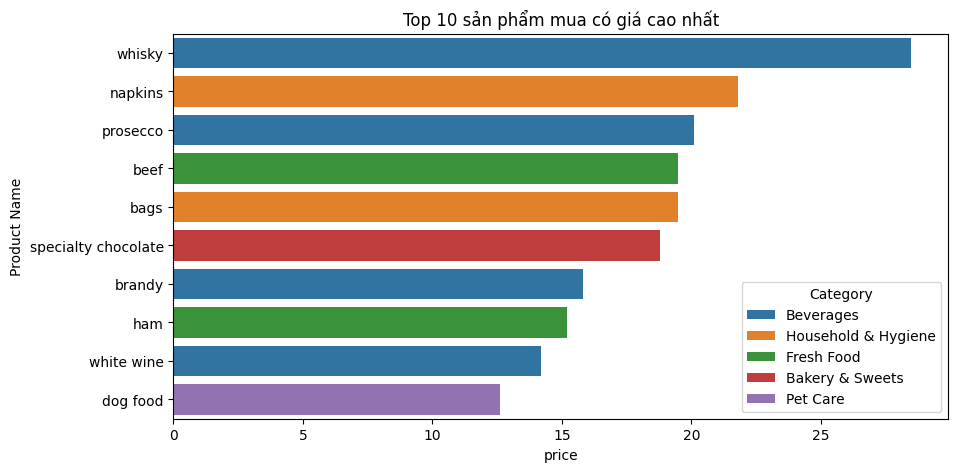

In [34]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_expensive_products2, x='price', y='productName', hue='Category')

plt.xlabel("price")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá cao nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá thấp nhất NEW: Cluster 2

In [35]:
top_10_cheapest_products2= df_new[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=True).head(10)

print(top_10_cheapest_products2)

                productName  price                 Category
4418            white bread    0.3          Bakery & Sweets
907             salty snack    0.5                   Snacks
83            bottled water    0.5                Beverages
1069            chewing gum    0.5     Specialty & Seasonal
457   Instant food products    0.6  Frozen & Processed Food
5135                   salt    0.7           Pantry Staples
28              brown bread    0.8          Bakery & Sweets
99                     soda    0.8                Beverages
3          other vegetables    0.8               Fresh Food
2421         snack products    0.9                   Snacks


In [36]:
top_10_cheapest_products2 = top_10_cheapest_products2.reset_index()

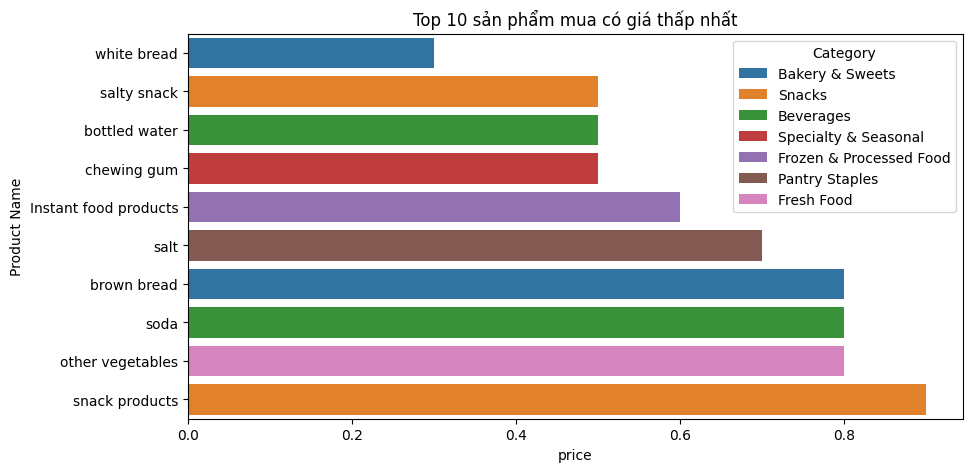

In [37]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_cheapest_products2, x='price', y='productName', hue='Category')

plt.xlabel("price")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu cao nhất NEW: Cluster 2

In [38]:
top_10_highest_revenue2 = df_new.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=False).head(10)

print(top_10_highest_revenue2)

             productName             Category  gross_sales
151       tropical fruit           Fresh Food      4126.20
7                   beef           Fresh Food      3198.00
159           whole milk                Dairy      2854.80
39                  curd                Dairy      2675.40
109                 pork           Fresh Food      2210.40
129        shopping bags  Household & Hygiene      2181.12
141  specialty chocolate      Bakery & Sweets      2086.80
92               napkins  Household & Hygiene      2071.00
155   whipped/sour cream                Dairy      2062.50
55           frankfurter           Fresh Food      2035.00


In [39]:
top_10_highest_revenue2 = top_10_highest_revenue2.reset_index()

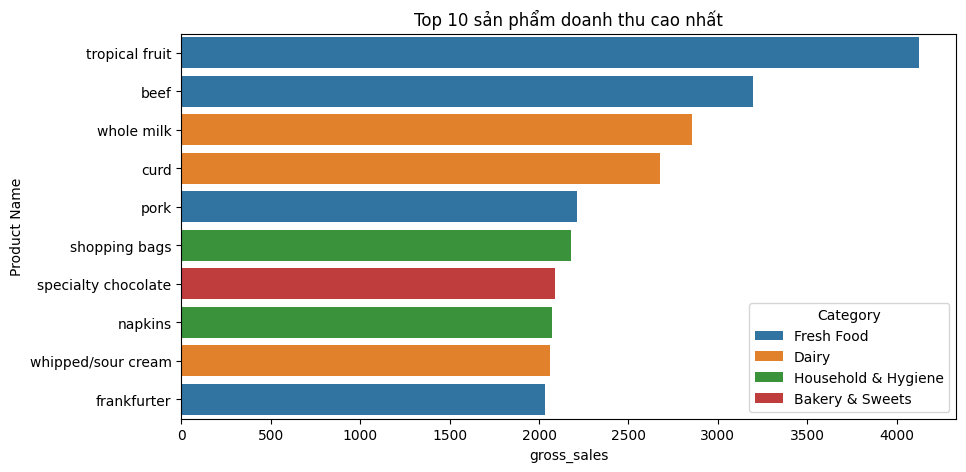

In [40]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_highest_revenue2, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu cao nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu thấp nhất NEW: Cluster 2

In [41]:
top_10_lowest_revenue2 = df_new.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=True).head(10)

print(top_10_lowest_revenue2)

                productName                 Category  gross_sales
115             ready soups  Frozen & Processed Food         3.90
84          make up remover            Personal Care         6.80
132          snack products                   Snacks         8.10
54   flower soil/fertilizer      Household & Hygiene         8.49
143    specialty vegetables               Fresh Food        13.00
41              decalcifier      Household & Hygiene        14.00
150                 tidbits                   Snacks        17.60
32             cocoa drinks                Beverages        18.90
37                    cream                    Dairy        20.80
56           frozen chicken  Frozen & Processed Food        21.00


In [42]:
top_10_lowest_revenue2 = top_10_lowest_revenue2.reset_index()

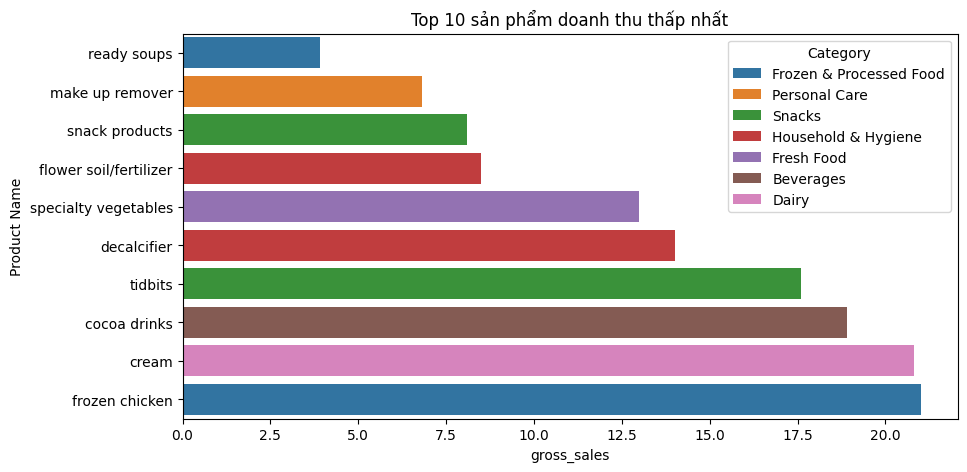

In [43]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_lowest_revenue2, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Thời điểm mua hàng nhiều nhất và ít nhất trong năm NEW: cluster 2

In [44]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['month'] = df_new['Date'].dt.month
df_new['year'] = df_new['Date'].dt.year
df_new['sales']=df_new['items']*df_new['price']
# Tính tổng doanh thu theo tháng
monthly_sales = df_new.groupby(['year', 'month'])['sales'].sum().reset_index()

max_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmax()]
min_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmin()]

print("Thời điểm mua hàng nhiều nhất mỗi năm:")
print(max_month_per_year)

print("\nThời điểm mua hàng ít nhất mỗi năm:")
print(min_month_per_year)

Thời điểm mua hàng nhiều nhất mỗi năm:
    year  month    sales
5   2014      6  3135.47
22  2015     11  7887.27

Thời điểm mua hàng ít nhất mỗi năm:
    year  month    sales
10  2014     11  2044.62
16  2015      5  2411.75


C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\4175023382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\4175023382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['Date'].dt.month
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\4175023382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

# Regular: cluster 4

In [45]:
df_regular = df[df["Cluster"] == 4]

### Top 10 sản phẩm mua nhiều nhất Regular: cluster 4

In [46]:
top_10_products4 = df_regular.groupby(["productName","Category"])["items"].sum().sort_values(ascending=False).head(10)
print(top_10_products4)

productName       Category       
whole milk        Dairy              1377
other vegetables  Fresh Food         1022
rolls/buns        Bakery & Sweets     909
soda              Beverages           870
yogurt            Dairy               701
tropical fruit    Fresh Food          582
root vegetables   Fresh Food          551
sausage           Fresh Food          524
bottled water     Beverages           500
pastry            Bakery & Sweets     477
Name: items, dtype: int64


In [47]:
top_10_products4 = top_10_products4.reset_index()

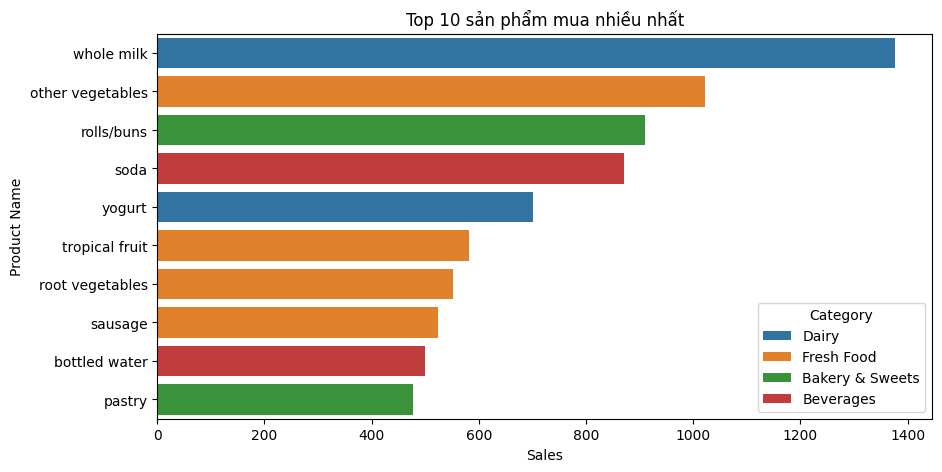

In [48]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_products4, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua nhiều nhất")  
plt.legend(title="Category")  
plt.show()

# Top 10 sản phẩm mua ít nhất Regular: cluster 4

In [49]:
tail_10_products4 = df_regular.groupby(["productName","Category"])["items"].sum().sort_values(ascending=True).head(10)
print(tail_10_products4)

productName            Category               
frozen fruits          Frozen & Processed Food    1
whisky                 Beverages                  1
rubbing alcohol        Household & Hygiene        2
salad dressing         Specialty & Seasonal       2
tidbits                Snacks                     2
preservation products  Household & Hygiene        2
bags                   Household & Hygiene        2
make up remover        Personal Care              3
pudding powder         Snacks                     3
bathroom cleaner       Household & Hygiene        4
Name: items, dtype: int64


In [50]:
tail_10_products4 = tail_10_products4.reset_index()

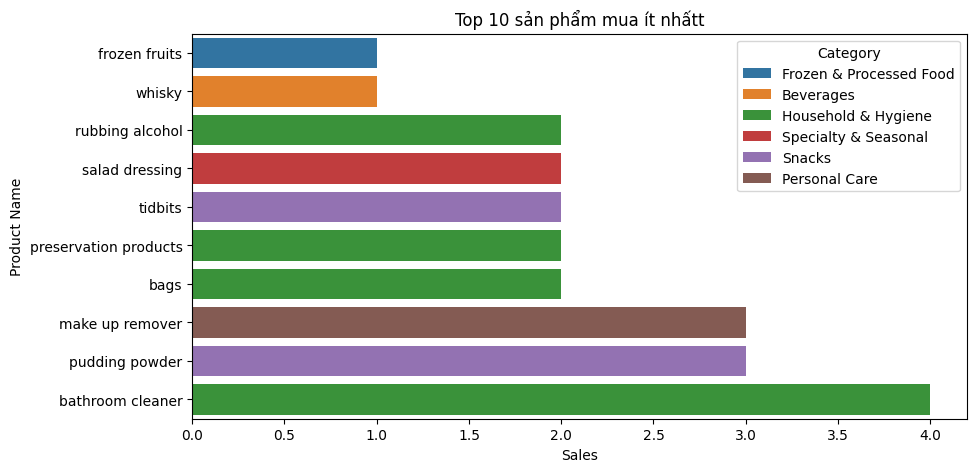

In [51]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=tail_10_products4, x='items', y='productName', hue='Category')

plt.xlabel("Sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua ít nhấtt")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá cao nhất Regular: cluster 4

In [52]:
top_10_expensive_products4 = df_regular[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=False).head(10)

print(top_10_expensive_products4)

               productName  price             Category
32369               whisky   28.5            Beverages
1504               napkins   21.8  Household & Hygiene
1176              prosecco   20.1            Beverages
105                   beef   19.5           Fresh Food
38022                 bags   19.5  Household & Hygiene
458    specialty chocolate   18.8      Bakery & Sweets
3845                brandy   15.8            Beverages
374                    ham   15.2           Fresh Food
1803            white wine   14.2            Beverages
3534              dog food   12.6             Pet Care


In [53]:
top_10_expensive_products4 = top_10_expensive_products4.reset_index()

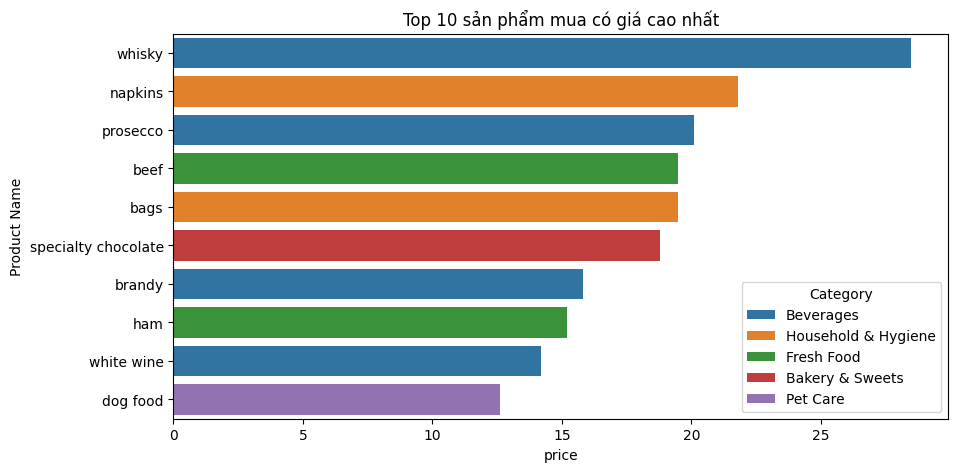

In [54]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_expensive_products4, x='price', y='productName', hue='Category')

plt.xlabel("price")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá cao nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm mua có giá thấp nhất Regular: cluster 4

In [55]:
top_10_cheapest_products4= df_regular[["productName", "price","Category"]].drop_duplicates().sort_values(by="price", ascending=True).head(10)

print(top_10_cheapest_products4)

                 productName  price                 Category
883              white bread    0.3          Bakery & Sweets
24             bottled water    0.5                Beverages
1326             chewing gum    0.5     Specialty & Seasonal
2236             salty snack    0.5                   Snacks
1267   Instant food products    0.6  Frozen & Processed Food
959                     salt    0.7           Pantry Staples
6           other vegetables    0.8               Fresh Food
2213             brown bread    0.8          Bakery & Sweets
88                      soda    0.8                Beverages
14804         snack products    0.9                   Snacks


In [56]:
top_10_cheapest_products4 = top_10_cheapest_products4.reset_index()

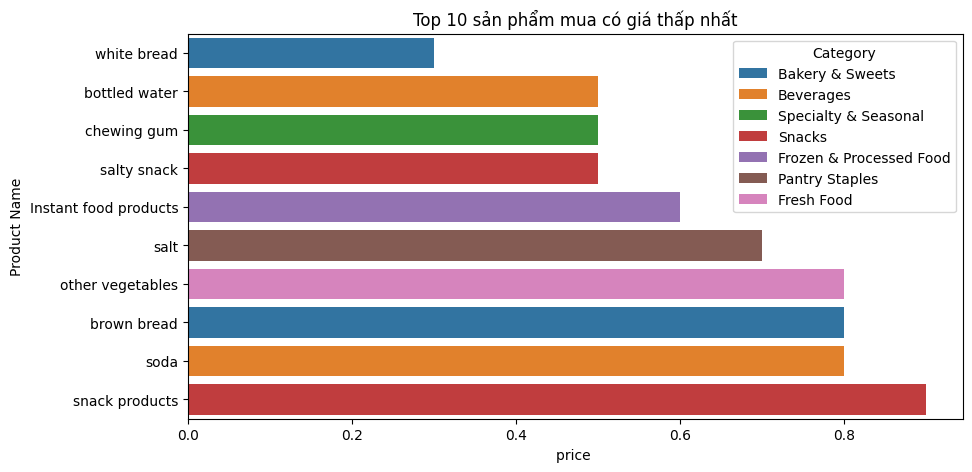

In [57]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_cheapest_products4, x='price', y='productName', hue='Category')

plt.xlabel("price ")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm mua có giá thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu cao nhất Regular: cluster 4

In [58]:
top_10_highest_revenue4 = df_regular.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=False).head(10)

print(top_10_highest_revenue4)

             productName             Category  gross_sales
154       tropical fruit           Fresh Food       4539.6
7                   beef           Fresh Food       4504.5
92               napkins  Household & Hygiene       2964.8
39                  curd                Dairy       2489.2
162           whole milk                Dairy       2478.6
143  specialty chocolate      Bakery & Sweets       2237.2
109                 pork           Fresh Food       2224.8
67        hamburger meat           Fresh Food       2214.0
33                coffee            Beverages       2091.0
27             chocolate      Bakery & Sweets       2035.5


In [59]:
top_10_highest_revenue4 = top_10_highest_revenue4.reset_index()

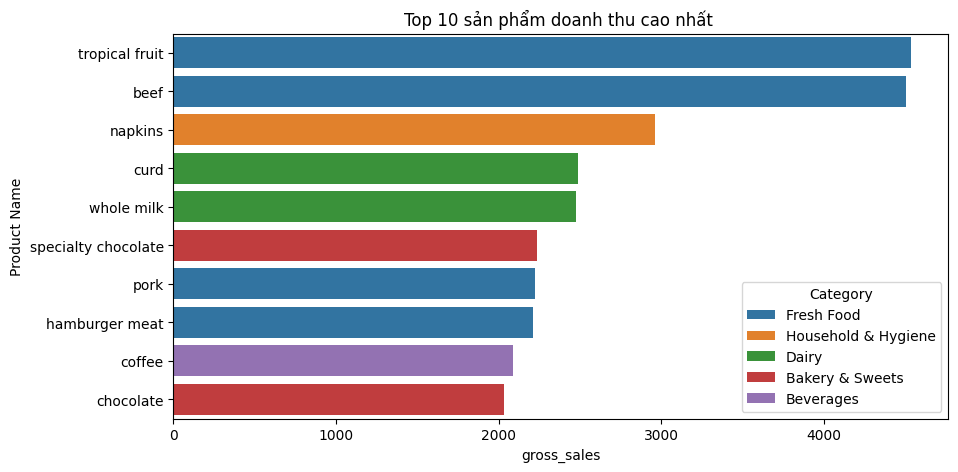

In [60]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_highest_revenue4, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu cao nhất ")  
plt.legend(title="Category")  
plt.show()

### Top 10 sản phẩm doanh thu thấp nhất Regular: cluster 4

In [61]:
top_10_lowest_revenue4 = df_regular.groupby(["productName","Category"])["gross_sales"].sum().reset_index().sort_values(by="gross_sales", ascending=True).head(10)

print(top_10_lowest_revenue4)

               productName                 Category  gross_sales
152                tidbits                   Snacks          2.2
59           frozen fruits  Frozen & Processed Food          2.5
122        rubbing alcohol      Household & Hygiene          5.0
76                 ketchup           Pantry Staples          7.5
84         make up remover            Personal Care         10.2
41             decalcifier      Household & Hygiene         11.2
124         salad dressing     Specialty & Seasonal         11.8
112  preservation products      Household & Hygiene         13.5
115         pudding powder                   Snacks         14.7
111        potato products  Frozen & Processed Food         16.8


In [62]:
top_10_lowest_revenue4 = top_10_lowest_revenue4.reset_index()

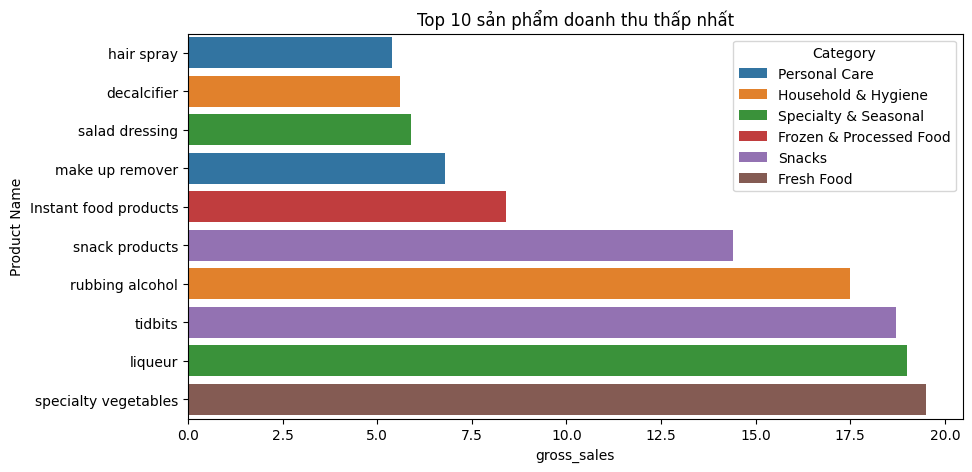

In [63]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_lowest_revenue, x='gross_sales', y='productName', hue='Category')

plt.xlabel("gross_sales")  
plt.ylabel("Product Name")  
plt.title("Top 10 sản phẩm doanh thu thấp nhất")  
plt.legend(title="Category")  
plt.show()

### Thời điểm mua hàng nhiều nhất và ít nhất trong năm Regular: cluster 4

In [64]:
df_regular['Date'] = pd.to_datetime(df_regular['Date'])
df_regular['month'] = df_regular['Date'].dt.month
df_regular['year'] = df_regular['Date'].dt.year
df_regular['sales']=df_regular['items']*df_regular['price']
# Tính tổng doanh thu theo tháng
monthly_sales = df_regular.groupby(['year', 'month'])['sales'].sum().reset_index()

max_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmax()]
min_month_per_year = monthly_sales.loc[monthly_sales.groupby('year')['sales'].idxmin()]

print("Thời điểm mua hàng nhiều nhất mỗi năm:")
print(max_month_per_year)

print("\nThời điểm mua hàng ít nhất mỗi năm:")
print(min_month_per_year)

Thời điểm mua hàng nhiều nhất mỗi năm:
    year  month    sales
9   2014     10  3867.04
16  2015      5  8664.28

Thời điểm mua hàng ít nhất mỗi năm:
    year  month    sales
8   2014      9  2647.02
13  2015      2  2865.19


C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\1161704850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['Date'] = pd.to_datetime(df_regular['Date'])
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\1161704850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular['month'] = df_regular['Date'].dt.month
C:\Users\Thu\AppData\Local\Temp\ipykernel_38840\1161704850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,